# Fortrat Diagram

To see how the band head appears, we would like to plot the Fortrat diagram with a given quantum number and interval. 
To do so, we use optional_quantum_states=True option in api.MdbExomol.  

In [1]:
from exojax.spec import api
emf='CO/12C-16O/Li2015'   
mdb = api.MdbExomol(emf, None, optional_quantum_states=True)

HITRAN exact name= (12C)(16O)
Background atmosphere:  H2


/home/kawahara/exojax/src/exojax/spec/api.py:154: UserWarning: nurange=None. Nonactive mode.
  warnings.warn("nurange=None. Nonactive mode.", UserWarning)


Error: Couldn't download .broad file at http://www.exomol.com/db/CO/12C-16O/12C-16O__air.broad and save.
Note: Caching states data to the vaex format. After the second time, it will become much faster.
Reading CO/12C-16O/Li2015/12C-16O__Li2015.trans.bz2
Note: Caching line transition data to the vaex format. After the second time, it will become much faster.
DataFrame (self.df) available.


Using DataFrame, we pick up the lines with $\Delta \nu = 2$, $\Delta J = \pm 1$ (R, P-branch), and $\nu = 0$ here.

In [2]:
dv = mdb.df["v_u"]-mdb.df["v_l"]
dJ = mdb.df["jupper"] - mdb.df["jlower"]
vmask = mdb.df["v_l"] == 0
mask_R = (dv == 2) * (dJ == 1) * vmask
mask_P = (dv == 2) * (dJ == -1) * vmask

df_R = mdb.df[mask_R]
df_P = mdb.df[mask_P]


Let's plot the Fortrat diagram. The y-axis of the Fortart diagram is $J_\mathrm{upper}$ for R-branch and $- J_\mathrm{lower}$ for P-branch.

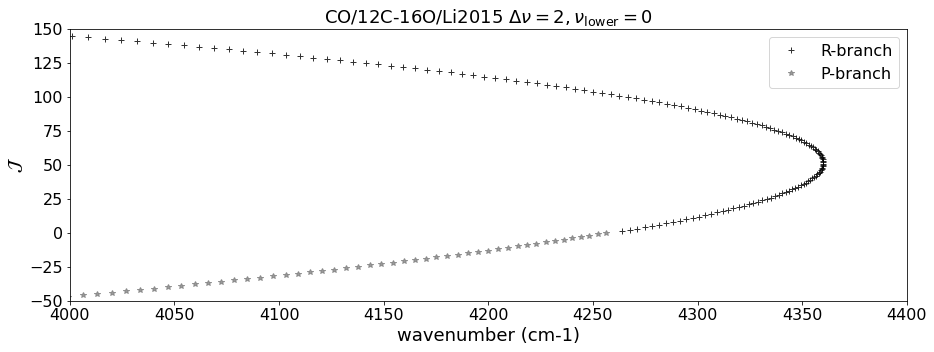

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
plt.plot(df_R["nu_lines"].values,df_R["jupper"].values,"+",alpha=0.8, color="black",label="R-branch")
plt.plot(df_P["nu_lines"].values,- df_P["jupper"].values,"*",alpha=0.8, color="gray",label="P-branch")
plt.tick_params(labelsize=16)
plt.xlabel("wavenumber (cm-1)", fontsize=18)
plt.ylabel("$\\mathcal{J}$", fontsize=18)
plt.legend(fontsize=16)
plt.title(emf+" $\\Delta \\nu = 2, \\nu_\\mathrm{lower} = 0$",fontsize=18)
plt.xlim(4000.,4400)
plt.ylim(-50,150)
plt.savefig("fortrat.png",  bbox_inches="tight", pad_inches=0.1)
plt.show()